# **Exploración**

<div style="text-align: justify;">Se descarga la Base de Datos "Estimation of obesity levels based on eating habits and physical condition Data Set" del repositorio en línea "UCI Machine Learning Repository" </div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../Datos/Base.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df.shape

(2111, 17)

<div style="text-align: justify;">Se identifica que el conjunto de datos cuenta con 17 variables y 2111 observaciones</div>

In [8]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [9]:
df.describe(include='number')

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [10]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

### Análisis descriptivo de variables

### Variables a considerar quitar en el modelo

Se eliminan las variables de altura y peso para evitar la multicolinealidad del Índice de Masa Corporal y no alterar el modelo para poder evidenciar los hábitos y características que influyen en la obesidad. 

In [8]:
df['NObeyesdad'] .value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

In [9]:
df.drop(columns=['Height', 'Weight'], inplace=True)

In [13]:
mapping = {
    'Obesity_Type_I': 'Obesidad',
    'Obesity_Type_II': 'Obesidad',
    'Obesity_Type_III': 'Obesidad',
    'Overweight_Level_I': 'Sobrepeso',
    'Overweight_Level_II': 'Sobrepeso',
    'Normal_Weight': 'Normal',
    'Insufficient_Weight': 'Bajo_Peso'
}

# Aplicar el mapeo a la columna de obesidad
df['NObeyesdad'] = df['NObeyesdad'].replace(mapping)


# Verificar los cambios
print(df['NObeyesdad'].value_counts())

NObeyesdad
Obesidad     972
Sobrepeso    580
Normal       287
Bajo_Peso    272
Name: count, dtype: int64


In [14]:
# La variable objetivo 'NObeyesdad' es categórica ('Obesidad', 'Sobrepeso', 'Normal', 'Bajo_Peso'). Se convierte a numérica

df['NObeyesdad'] = df['NObeyesdad'].map({'Bajo_Peso': 0, 'Normal': 1, 'Sobrepeso': 2, 'Obesidad': 3})

df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,1
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,1
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,1
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,2
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [15]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

In [16]:
columna_entrada = ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC','NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
columna_salida = ['NObeyesdad']

In [17]:
X = df[columna_entrada]
X
X.select_dtypes(include="object")

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation
3,Male,no,no,Sometimes,no,no,Frequently,Walking
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation


In [18]:
X_trans_object = pd.get_dummies(X.select_dtypes(include="object"))
X_trans_object

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,True,False,False,True,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,True,False,False,True,True,False,False,False,True,False,...,True,False,False,True,False,False,False,False,True,False
2,False,True,False,True,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
3,False,True,True,False,True,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,True
4,False,True,True,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2107,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2108,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
2109,True,False,False,True,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [19]:
X = pd.concat([X.select_dtypes(exclude="object"), X_trans_object],axis= 1)
X

,Age,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,True,False,False,True,...,False,False,False,False,True,False,False,False,True,False
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,False,True,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False


In [20]:
y = df[columna_salida]
y

,NObeyesdad
0,1
1,1
2,1
3,2
4,2
...,...
2106,3
2107,3
2108,3
2109,3


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [23]:
y_pred = modelo.predict(X_test)
print("Matriz de confusion: \n", confusion_matrix(y_test, y_pred))

Matriz de confusion: 
 [[ 44   6   4   2]
 [ 13  27  10  12]
 [  7  10  39  50]
 [  0   3  26 170]]


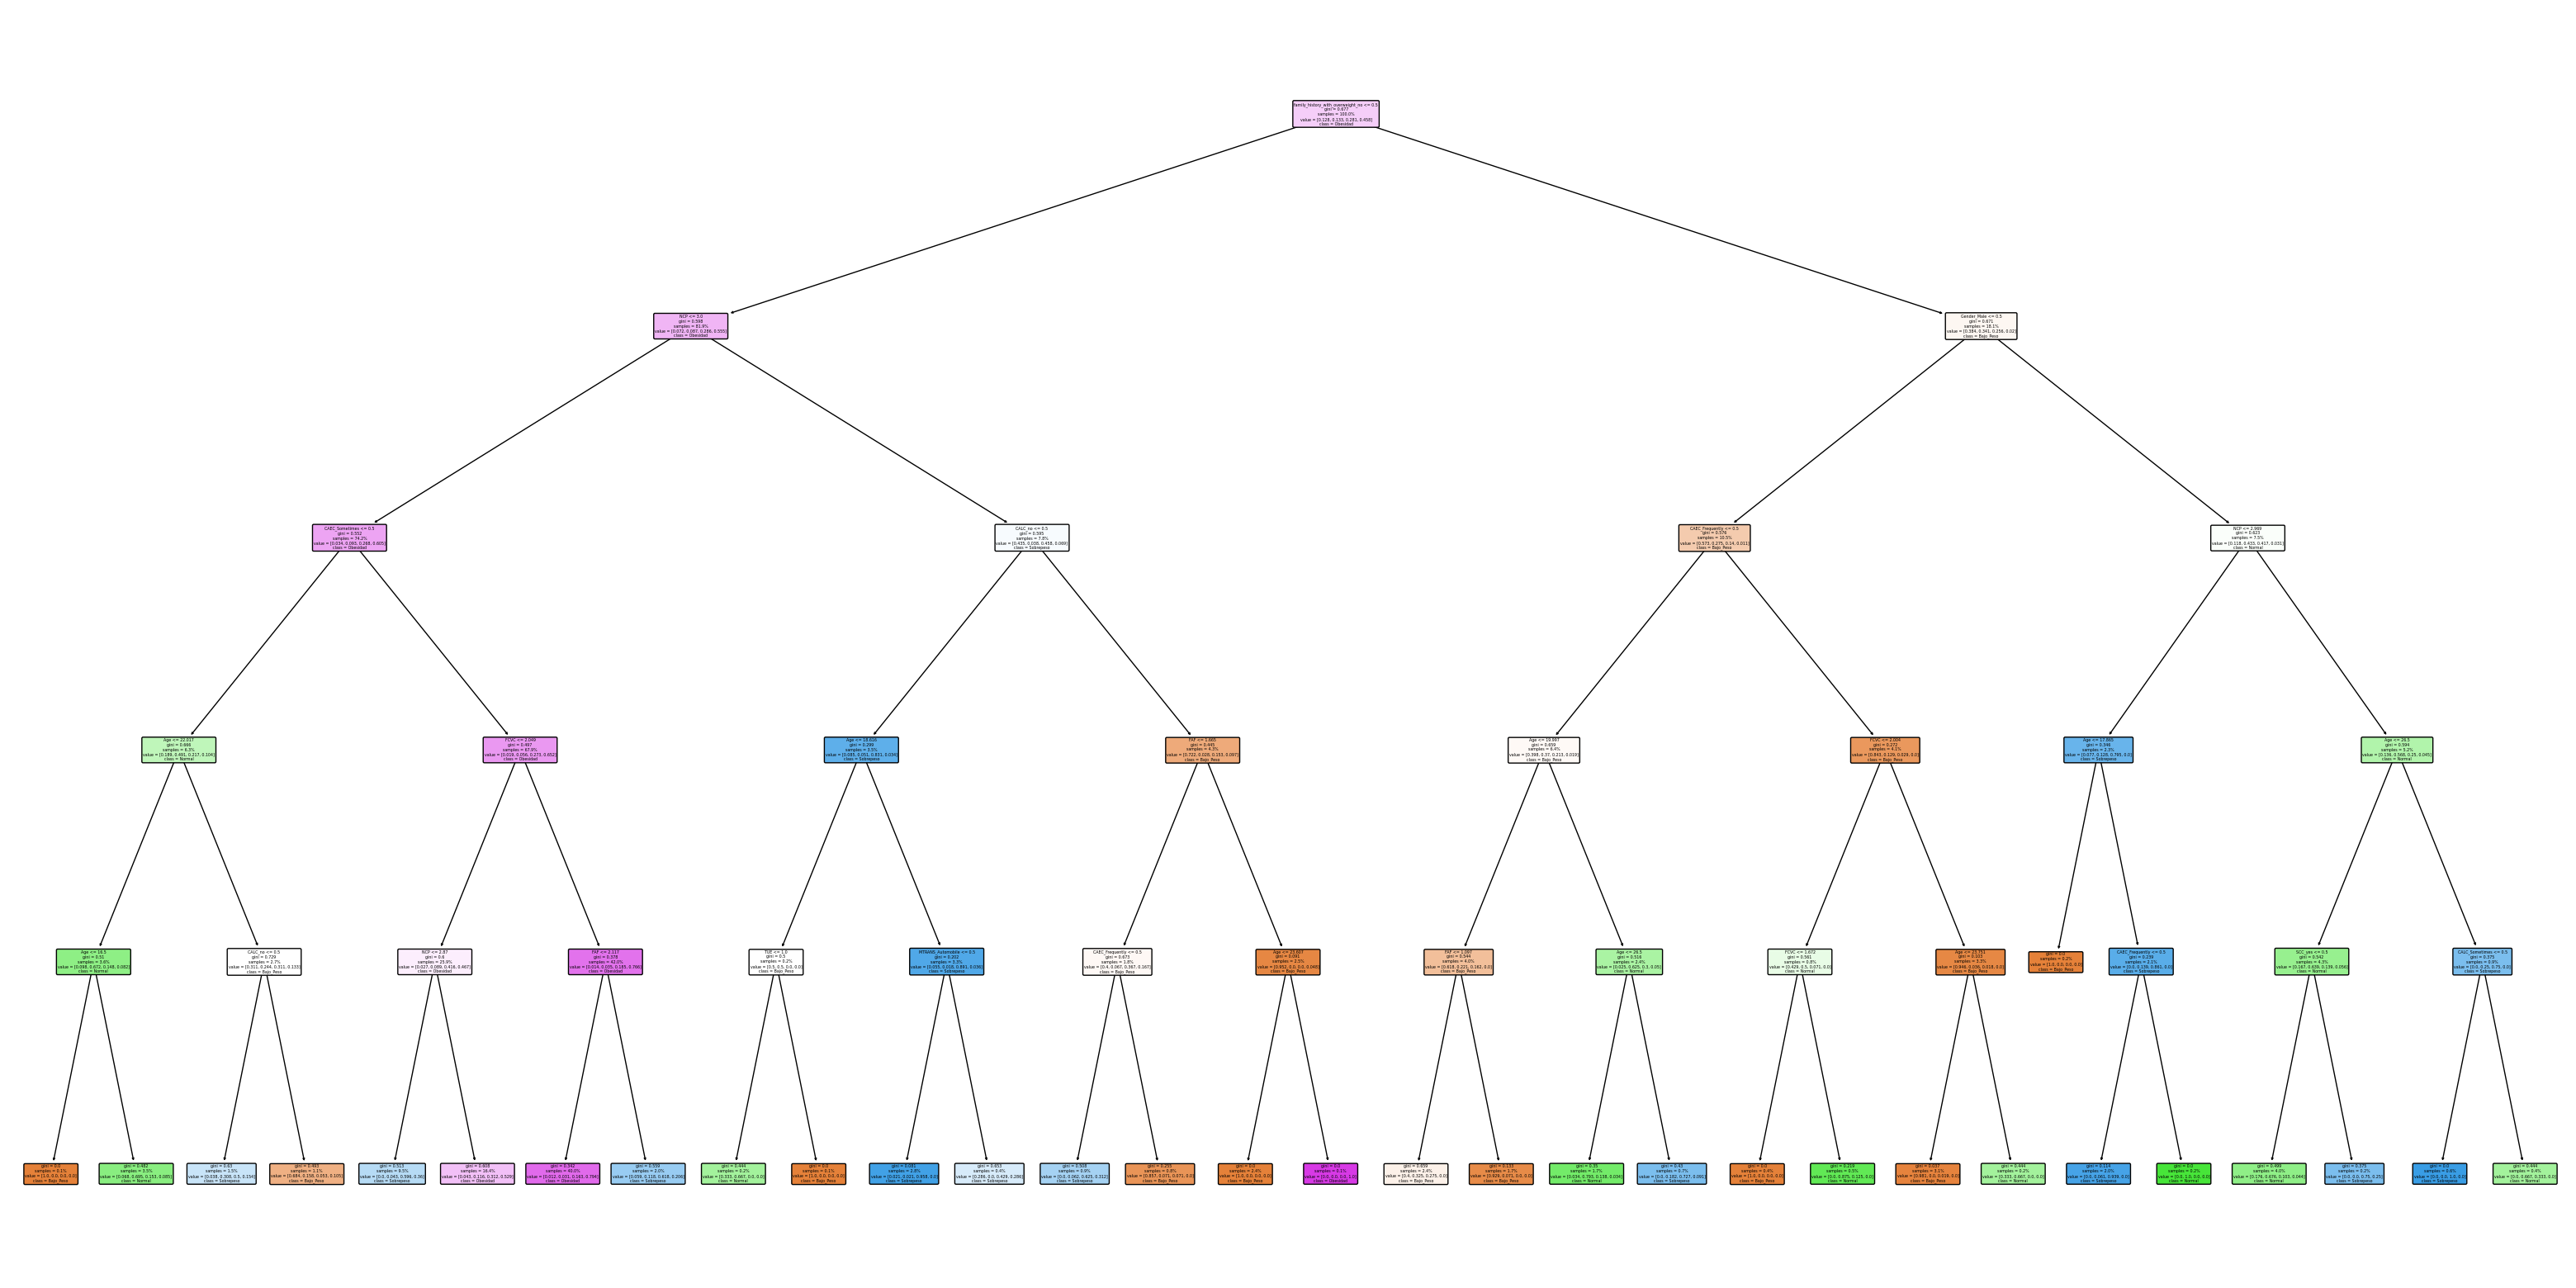

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
plot_tree(modelo, filled=True, feature_names=X.columns, class_names=['Bajo_Peso', 'Normal', 'Sobrepeso', 'Obesidad'], rounded=True, proportion=True)
plt.savefig("Arbol de decisión de obesidad.png")

In [25]:
print("Matriz de confusion: \n", classification_report(y_test, y_pred))

Matriz de confusion: 
               precision    recall  f1-score   support

           0       0.69      0.79      0.73        56
           1       0.59      0.44      0.50        62
           2       0.49      0.37      0.42       106
           3       0.73      0.85      0.79       199

    accuracy                           0.66       423
   macro avg       0.62      0.61      0.61       423
weighted avg       0.64      0.66      0.65       423



In [34]:

nuevas_instancias = [[30, 4, 2, 3, 2, 1, True, False, False, True, False, True, False, False, True, False, False, True, True, False, False, True, False, False, False, True, False, False, False]]

columnas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes',
       'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no',
       'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking']
nuevas_instancias_df = pd.DataFrame(nuevas_instancias, columns=columnas)

predicciones = modelo.predict(nuevas_instancias_df)
print(predicciones)


[3]


<Axes: >

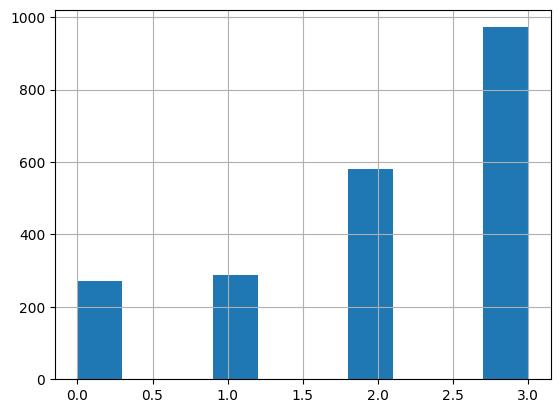

In [35]:
df['NObeyesdad'].hist()


In [42]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder
from sklearn.compose import ColumnTransformer

### Trabajaremos de acuerdo al plan de preprocesamiento

OHE_COLS=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

## Instanciamos los objetos
ohe=OneHotEncoder()

## Hacemos el fit de los objetos con los datos

ohe.fit(df[OHE_COLS])


## Hacemos la transformación de los datos

df_data_cat=ohe.transform(df[OHE_COLS]).toarray()
df_data_cat
pd.DataFrame(df_data_cat)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
# Valor máximo en la variable 'variable'
max_valor = df['Age'].max()

# Valor mínimo en la variable 'variable'
min_valor = df['Age'].min()

print("Valor máximo:", max_valor)
print("Valor mínimo:", min_valor)

Valor máximo: 61.0
Valor mínimo: 14.0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## HAcemos las estandarización de las variables numéricas de la siguiente forma:
## StandardScaler -> ['capital-gain', 'capital-loss']
## MinMaxScaler -> ['age','hours-per-week']

#SS_COLS=['capital-gain', 'capital-loss']
#MM_COLS=['age','hours-per-week']

## Instanciamos los objetos
#ss=StandardScaler()
#mm=MinMaxScaler()

## Hacemos el fit de los objetos con los datos

#ss.fit(adult[SS_COLS])      
#mm.fit(adult[MM_COLS])

## Hacemos la transformación de los datos

#ss_data=ss.transform(adult[SS_COLS])
#mm_data=mm.transform(adult[MM_COLS])

## Hacemos un merge de los datos

#adult_data_num=pd.concat([pd.DataFrame(ss_data),pd.DataFrame(mm_data)],axis=1)
#adult_data_num.columns=['capital-gain', 'capital-loss','age','hours-per-week']

#adult_data_num.head()